In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#First let's import the data into a pandas dataframe
#This is the location on the tablet. Comment out whichever is not being used.
#df = pd.read_csv('C:/Users/Julius/Downloads/slqbritishconvictregisters201605_clean.csv', nrows=1000)
#This is the location on the desktop
df = pd.read_csv('D:\LargeDataSets\Australia/slqbritishconvictregisters201605_clean.csv', nrows=50)


In [4]:
#Let's take a quick look at it to see what we've got
df.head()

,Convict Name,Name - Alias - 1,Name - Alias - 2,Name - Alias - 3,Name - Alias - 4,Name - Alias - 5,Name - Alias - 6,Name - Alias - 7,Sentence details,Vessel,Date of Departure,Place of Arrival,Source,Title,Publication details,Original version note,Topical subject heading,Geographic subject heading,Unnamed: 18,Unnamed: 19
0,"Downes, Thomas.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Convicted at Chester Assizes for a term of 15 ...,Neptune,04 October 1837.,Van Diemen's Land.,"Microfilm Roll 90, Class and Piece Number HO11...","Thomas Downes, one of 350 convicts transported...",Canberra [A.C.T.] :Australian Joint Copying Pr...,This record is one of the entries in the Briti...,Convicts--Australia--Registers.,Australia--Genealogy.,NaN,NaN
1,"Moore, Henry.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Convicted 04 January 1847 at Central Criminal ...,Mount Stewart Elphinstone,01 June 1849.,Moreton Bay.,"Microfilm Roll 92, Class and Piece Number HO11...","Henry Moore, one of 230 convicts transported o...",Canberra [A.C.T.] :Australian Joint Copying Pr...,This record is one of the entries in the Briti...,Convicts--Australia--Registers.,Australia--Genealogy.,NaN,NaN
2,"Westwood, Ann.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Convicted at Worcester Quarter Session for a ...,Edward,23 April 1834.,Van Diemen's Land.,"Microfilm Roll 90, Class and Piece Number HO11...","Ann Westwood, one of 151 convicts transported ...",Canberra [A.C.T.] :Australian Joint Copying Pr...,This record is one of the entries in the Briti...,Convicts--Australia--Registers.,Australia--Genealogy.,NaN,NaN
3,"Mulcrarty, Patrick.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Convicted at ""Gladiator"" Portsmouth Court Mart...",Indefatigable;Minstrel,09 May 1812.,New South Wales [Minstrel] and Van Diemen's La...,"Microfilm Roll 87, Class and Piece Number HO11...","Patrick Mulcrarty, one of 327 convicts transpo...",Canberra [A.C.T.] :Australian Joint Copying Pr...,This record is one of the entries in the Briti...,Convicts--Australia--Registers.,Australia--Genealogy.,NaN,NaN
4,"Okey, Tryce.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Convicted at ""Gladiator"" Portsmouth Court Mart...",Indefatigable;Minstrel,09 May 1812.,New South Wales [Minstrel] and Van Diemen's La...,"Microfilm Roll 87, Class and Piece Number HO11...","Tryce Okey, one of 327 convicts transported on...",Canberra [A.C.T.] :Australian Joint Copying Pr...,This record is one of the entries in the Briti...,Convicts--Australia--Registers.,Australia--Genealogy.,NaN,NaN


In [5]:
#The column names look like they might have weird spacing, let's see what they all are so we know what to call them
df.columns

Index(['Convict Name ', 'Name - Alias - 1', 'Name - Alias - 2',
       'Name - Alias - 3', 'Name - Alias - 4', 'Name - Alias - 5',
       'Name - Alias - 6', 'Name - Alias - 7', 'Sentence details', 'Vessel',
       'Date of Departure', 'Place of Arrival', 'Source', 'Title',
       'Publication details', 'Original version note',
       'Topical subject heading', 'Geographic subject heading', 'Unnamed: 18',
       'Unnamed: 19'],
      dtype='object')

In [6]:
#OK, notice the space after "Convict Name". Let's look at the names
df['Convict Name ']

0           Downes, Thomas.
1             Moore, Henry.
2            Westwood, Ann.
3       Mulcrarty, Patrick.
4              Okey, Tryce.
5            McGuire, John.
6       Grimshaw, Benjamin.
7              Scott, John.
8       Townshend, Richard.
9             Denner, John.
10        Matthews, Thomas.
11          Walker, George.
12      Gilbrith, Mary Ann.
13           Conner, James.
14       Cheshire, William.
15           Lyon, Charles.
16         Shyers, William.
17      McLauchlan, Robert.
18            Earp, George.
19            Mudie, David.
20    Robertson, Elizabeth.
21        McDonald, Ronald.
22          Gray, Margaret.
23         Young, Euphemia.
24              Young, Ann.
25          Mason, William.
26           Frost, George.
27           Duncan, James.
28            Clark, James.
29           Emslie, Peter.
30             Brown, John.
31         Webster, Martha.
32        Wilson, Margaret.
33       McDonald, William.
34            Calder, John.
35         McCaskill

In [7]:
#Now let's make a new dataframe and clean it up a bit
df1=df.copy()
#All the alias columns get in the way and they're mostly empty - let's drop them
#Let's also drop the unnamed 18 and 19
df1.drop(df1.columns[[1,2,3,4,5,6,7, 18, 19]], axis=1, inplace=True)
#Now let's take a look at it
df1.head()

,Convict Name,Sentence details,Vessel,Date of Departure,Place of Arrival,Source,Title,Publication details,Original version note,Topical subject heading,Geographic subject heading
0,"Downes, Thomas.",Convicted at Chester Assizes for a term of 15 ...,Neptune,04 October 1837.,Van Diemen's Land.,"Microfilm Roll 90, Class and Piece Number HO11...","Thomas Downes, one of 350 convicts transported...",Canberra [A.C.T.] :Australian Joint Copying Pr...,This record is one of the entries in the Briti...,Convicts--Australia--Registers.,Australia--Genealogy.
1,"Moore, Henry.",Convicted 04 January 1847 at Central Criminal ...,Mount Stewart Elphinstone,01 June 1849.,Moreton Bay.,"Microfilm Roll 92, Class and Piece Number HO11...","Henry Moore, one of 230 convicts transported o...",Canberra [A.C.T.] :Australian Joint Copying Pr...,This record is one of the entries in the Briti...,Convicts--Australia--Registers.,Australia--Genealogy.
2,"Westwood, Ann.",Convicted at Worcester Quarter Session for a ...,Edward,23 April 1834.,Van Diemen's Land.,"Microfilm Roll 90, Class and Piece Number HO11...","Ann Westwood, one of 151 convicts transported ...",Canberra [A.C.T.] :Australian Joint Copying Pr...,This record is one of the entries in the Briti...,Convicts--Australia--Registers.,Australia--Genealogy.
3,"Mulcrarty, Patrick.","Convicted at ""Gladiator"" Portsmouth Court Mart...",Indefatigable;Minstrel,09 May 1812.,New South Wales [Minstrel] and Van Diemen's La...,"Microfilm Roll 87, Class and Piece Number HO11...","Patrick Mulcrarty, one of 327 convicts transpo...",Canberra [A.C.T.] :Australian Joint Copying Pr...,This record is one of the entries in the Briti...,Convicts--Australia--Registers.,Australia--Genealogy.
4,"Okey, Tryce.","Convicted at ""Gladiator"" Portsmouth Court Mart...",Indefatigable;Minstrel,09 May 1812.,New South Wales [Minstrel] and Van Diemen's La...,"Microfilm Roll 87, Class and Piece Number HO11...","Tryce Okey, one of 327 convicts transported on...",Canberra [A.C.T.] :Australian Joint Copying Pr...,This record is one of the entries in the Briti...,Convicts--Australia--Registers.,Australia--Genealogy.


In [8]:
#Let's look at some sentence details
#We might have problems with truncation. Let's ask pandas not to do that 
pd.set_option('display.max_colwidth', -1) #This tells pandas to make the column width the size of the lagest column, so nothing is lost
df1['Sentence details'][0:20]

0     Convicted at Chester Assizes for a term of 15 years on  August 1837.                                                                                                                 
1     Convicted 04 January 1847 at Central Criminal Court for a term of 7 years.                                                                                                           
2     Convicted at  Worcester Quarter Session for a term of 14 years on 20 February 1834.                                                                                                  
3     Convicted at "Gladiator" Portsmouth Court Martial for a term of life on 17 September 1811.                                                                                           
4     Convicted at "Gladiator" Portsmouth Court Martial for a term of life on 29 October 1811.                                                                                             
5     Convicted at "Palermo" Court Martial for a term of lif

In [9]:
#I bet we can extract the term length from the "Sentence details" column and put it into a new column
#Let's start with removing everything that doesn't contain the work "term"
df2 = df1[df1['Sentence details'].str.contains('term')].copy()
#We should go over what we removed at some point and see if there's anything else we could use

#Let's add a column named Sentence, which will be the sentence in years
df2.insert(1,'Sentence', 0) #1 is the new column index, 0 is the initial value 
#Now let's go over the df and grab the sentence
import re
for x in df2.index:
    try:
        df2['Sentence'][x] = re.search(r'term\sof\s(\d+)', df2['Sentence details'][x]).group(1)
    except AttributeError: #We might get an attribute error if it's a life term
        df2['Sentence'][x] = 50 #Was a life sentence

C:\Users\HMGSYS\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HMGSYS\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
#Let's bring back the truncation so the Sentences are easier to see
pd.set_option('display.max_colwidth', 20) #This tells pandas to make the column width the size of the lagest column, so nothing is lost
df2

,Convict Name,Sentence,Sentence details,Vessel,Date of Departure,Place of Arrival,Source,Title,Publication details,Original version note,Topical subject heading,Geographic subject heading
0,"Downes, Thomas.",15,Convicted at Che...,Neptune,04 October 1837.,Van Diemen's Land.,Microfilm Roll 9...,"Thomas Downes, o...",Canberra [A.C.T....,This record is o...,Convicts--Austra...,Australia--Genea...
1,"Moore, Henry.",7,Convicted 04 Jan...,Mount Stewart El...,01 June 1849.,Moreton Bay.,Microfilm Roll 9...,"Henry Moore, one...",Canberra [A.C.T....,This record is o...,Convicts--Austra...,Australia--Genea...
2,"Westwood, Ann.",14,Convicted at Wo...,Edward,23 April 1834.,Van Diemen's Land.,Microfilm Roll 9...,"Ann Westwood, on...",Canberra [A.C.T....,This record is o...,Convicts--Austra...,Australia--Genea...
3,"Mulcrarty, Patrick.",50,"Convicted at ""Gl...",Indefatigable;Mi...,09 May 1812.,New South Wales ...,Microfilm Roll 8...,Patrick Mulcrart...,Canberra [A.C.T....,This record is o...,Convicts--Austra...,Australia--Genea...
4,"Okey, Tryce.",50,"Convicted at ""Gl...",Indefatigable;Mi...,09 May 1812.,New South Wales ...,Microfilm Roll 8...,"Tryce Okey, one ...",Canberra [A.C.T....,This record is o...,Convicts--Austra...,Australia--Genea...
5,"McGuire, John.",50,"Convicted at ""Pa...",General Hewitt,August 1813.,New South Wales.,Microfilm Roll 8...,John McGuire one...,Canberra [A.C.T....,This record is o...,Convicts--Austra...,Australia--Genea...
6,"Grimshaw, Benjamin.",50,"Convicted at ""Th...",Indian,July 1810.,New South Wales.,Microfilm Roll 8...,Benjamin Grimsha...,Canberra [A.C.T....,This record is o...,Convicts--Austra...,Australia--Genea...
7,"Scott, John.",50,"Convicted at ""Th...",Indian,July 1810.,New South Wales.,Microfilm Roll 8...,"John Scott, one ...",Canberra [A.C.T....,This record is o...,Convicts--Austra...,Australia--Genea...
8,"Townshend, Richard.",50,"Convicted at ""Tr...",Duke of Portland,January 1807.,New South Wales.,Microfilm Roll 8...,Richard Townshen...,Canberra [A.C.T....,This record is o...,Convicts--Austra...,Australia--Genea...
10,"Matthews, Thomas.",10,Convicted at [No...,Adelaide,13 May 1863.,Gibraltar.,Microfilm Roll 9...,"Thomas Matthews,...",Canberra [A.C.T....,This record is o...,Convicts--Gibral...,Gibraltar--Genea...


(array([  8.,  20.,   9.,   1.,   0.,   0.,   0.,   0.,   0.,   7.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

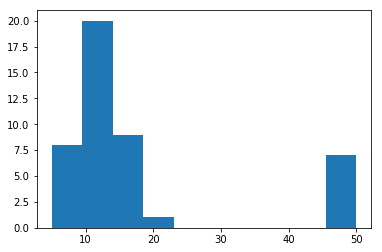

In [11]:
#Let's take a look at what we've got
plt.hist(df2['Sentence'])
#labels = [5,10,15,20,25,30,35,40,45,'life']
#plt.xticks(labels)

In [12]:
#Maybe divide this between small and large crimes?